In [5]:
# import matplotlib.pyplot as plt
# import sys
# import pandas as pd
# from methods_dump import *
from vtianalysis import *
from vtkanalysis import *


: 

In [4]:
# vtk = VTKAnalysis(r"E:\vts files for noise comparison")
vtk = VTKAnalysis(r"E:\503 RE wing_sim")
src = LegacyVTKReader(r"E:\503 RE wing_sim\npz_files\Wing_v2_pipe_dirty_with_dye_lvl=12_CFL=10.000000_TV=1.000000_angle=-0.800000_Re=503.000000_0391.npz")
dir_path = r"E:\2024_05_08\531rpm_downstream"
muvi = VTIAnalysis(dir_path)
exp_df = pd.read_pickle(os.path.join(muvi.measure_path, 'vortex_measurements.pkl'))
sim_df = pd.read_pickle(os.path.join(vtk.npz_dir_path, 'vtk_data.pkl'))
stats_data_exp = pd.read_pickle(os.path.join(muvi.measure_path, 'vortex_measurements_avg.pkl'))
stats_data_sim = pd.read_pickle(os.path.join(vtk.npz_dir_path, 'vtk_stats_data.pkl'))


NameError: name 'VTKAnalysis' is not defined

In [10]:
vtk.compute_values(vort_range=(0.04,5))

Resampling frame: 200...
Resampling frame: 201...
Resampling frame: 202...
Resampling frame: 203...
Resampling frame: 204...
Resampling frame: 205...
Resampling frame: 206...
Resampling frame: 207...
Resampling frame: 208...
Resampling frame: 209...
Resampling frame: 210...
Resampling frame: 211...
Resampling frame: 212...
Resampling frame: 213...
Resampling frame: 214...
Resampling frame: 215...
Resampling frame: 216...
Resampling frame: 217...
Resampling frame: 218...
Resampling frame: 219...
Resampling frame: 220...
Resampling frame: 221...
Resampling frame: 222...
Resampling frame: 223...
Resampling frame: 224...
Resampling frame: 225...
Resampling frame: 226...
Resampling frame: 227...
Resampling frame: 228...
Resampling frame: 229...
Resampling frame: 230...
Resampling frame: 231...
Resampling frame: 232...
Resampling frame: 233...
Resampling frame: 234...
Resampling frame: 235...
Resampling frame: 236...
Resampling frame: 237...
Resampling frame: 238...
Resampling frame: 239...


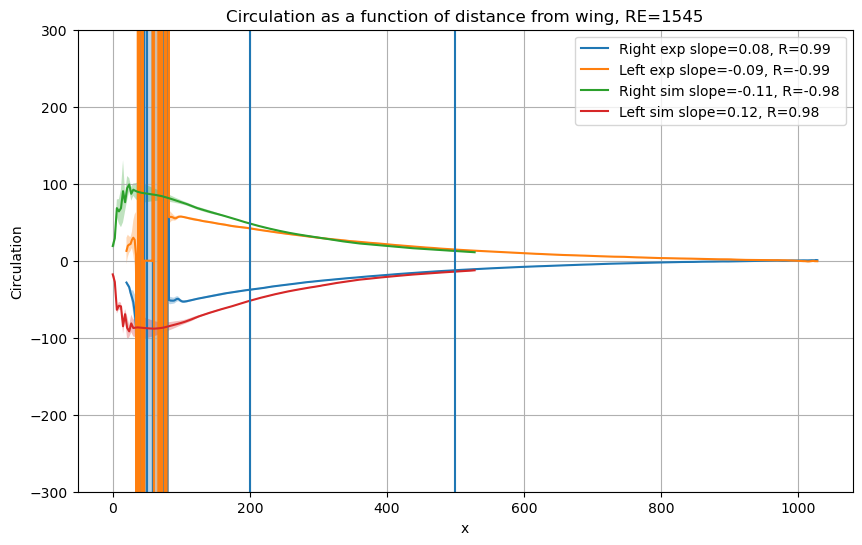

In [14]:
from scipy.stats import linregress
x_values_exp = stats_data_exp['x']
right_mean_exp = stats_data_exp['right_circ_d_mean']
right_std_exp = stats_data_exp['right_circ_d_std']
left_mean_exp = stats_data_exp['left_circ_d_mean']
left_std_exp = stats_data_exp['left_circ_d_std']

x_values_sim = stats_data_sim['x']
right_mean_sim = stats_data_sim['right_circ_d_mean']
right_std_sim = stats_data_sim['right_circ_d_std']
left_mean_sim = stats_data_sim['left_circ_d_mean']
left_std_sim = stats_data_sim['left_circ_d_std']

x_values_exp = pd.to_numeric(stats_data_exp['x'], errors='coerce')
x_values_sim = pd.to_numeric(stats_data_sim['x'], errors='coerce')

x_slope_start = 200
x_slope_end = 500

# Filter data within the range x = 100 to x = 300
def filter_data(x_values, mean_values, std_values, start=x_slope_start, end=x_slope_end):
    mask = (x_values >= start) & (x_values <= end)
    return x_values[mask], mean_values[mask], std_values[mask]

x_values_exp_100_300, right_mean_exp_100_300, _ = filter_data(x_values_exp, right_mean_exp, right_std_exp)
_, left_mean_exp_100_300, _ = filter_data(x_values_exp, left_mean_exp, left_std_exp)
x_values_sim_100_300, right_mean_sim_100_300, _ = filter_data(x_values_sim, right_mean_sim, right_std_sim)
_, left_mean_sim_100_300, _ = filter_data(x_values_sim, left_mean_sim, left_std_sim)

# Perform linear regression
def linear_regression(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope, r_value

right_slope_exp, right_r_exp= linear_regression(x_values_exp_100_300, right_mean_exp_100_300)
left_slope_exp, left_r_exp= linear_regression(x_values_exp_100_300, left_mean_exp_100_300)
right_slope_sim, right_r_sim= linear_regression(x_values_sim_100_300, right_mean_sim_100_300)
left_slope_sim, left_r_sim= linear_regression(x_values_sim_100_300, left_mean_sim_100_300)

plt.figure(figsize=(10, 6))
plt.plot(x_values_exp, right_mean_exp, label=f'Right exp slope={right_slope_exp:.2f}, R={right_r_exp:.2f}')
plt.fill_between(x_values_exp, right_mean_exp-right_std_exp, right_mean_exp+right_std_exp, alpha=0.3)
plt.plot(x_values_exp, left_mean_exp, label=f'Left exp slope={left_slope_exp:.2f}, R={left_r_exp:.2f}')
plt.fill_between(x_values_exp, left_mean_exp-left_std_exp, left_mean_exp+left_std_exp, alpha=0.3)
plt.plot(x_values_sim, right_mean_sim, label=f'Right sim slope={right_slope_sim:.2f}, R={right_r_sim:.2f}')
plt.fill_between(x_values_sim, right_mean_sim-right_std_sim, right_mean_sim+right_std_sim, alpha=0.3)
plt.plot(x_values_sim, left_mean_sim, label=f'Left sim slope={left_slope_sim:.2f}, R={left_r_sim:.2f}')
plt.fill_between(x_values_sim, left_mean_sim-left_std_sim, left_mean_sim+left_std_sim, alpha=0.3)
plt.vlines(x_slope_start,-300,300)
plt.vlines(x_slope_end,-300,300)

plt.xlabel('x')
plt.ylabel('Circulation')
plt.title('Circulation as a function of distance from wing, RE=1545')
plt.legend()
# plt.xlim(0,600)
plt.ylim(-300,300)
plt.grid(True)
plt.show()

In [44]:
print(src.points.min(axis=0))
print(src.points.max(axis=0))

[ -96. -315. -315.]
[534. 315. 315.]


In [4]:
# Define the 3D grid
x = np.linspace(src.points.min(axis=0)[0], src.points.max(axis=0)[0], 200)
y = np.linspace(-25, 25, 300)
z = np.linspace(-25, 25, 300)

# Create a meshgrid for 3D coordinates
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Stack the coordinates to create the 3D grid points
grid_points = np.stack([X, Y, Z], axis=-1)

print("Resampling velocity, vorticity, and concentration...")
# Note: resampling multiple fields at once is faster than one at a time
# This is because the cell index can be reused.
# V, omega, c,g = src.resample(grid_points, 'velocity', 'vorticity', 'concentration', 'geometry')
V, omega, c = src.resample(grid_points, 'velocity', 'vorticity', 'concentration')

# V = np.transpose(V,(0,2,1,3))
# omega = np.transpose(omega,(0,2,1,3))
# c = np.transpose(c,(0,2,1,3))
# g = np.transpose(g,(0,2,1,3))
print(V.shape)

Resampling velocity, vorticity, and concentration...
(200, 300, 300, 3)


In [16]:
import muvi.geometry.points as points
from muvi.geometry.resample import windowed_polynomial_resample


In [21]:
h = (2,2,2) #Determines resolution, can be an (x,y,z) tuple for different dimensions
X0 = (-src.points.min(axis=0)[0],-25,-25)
X1 = (src.points.max(axis=0)[0],25,25)
h = np.ones(3) * h
X0 = np.ones(3) * X0
X1 = np.ones(3) * X1
N = np.round((X1 - X0) / h + 1).astype('I')
Rn = []
for i in range(3):
    Rn.append((np.arange(N[i]) - (N[i]-1)/2) * h[i])
R = grid( Rn[0],  Rn[1],  Rn[2])


In [25]:
Rn[1]

array([-25., -23., -21., -19., -17., -15., -13., -11.,  -9.,  -7.,  -5.,
        -3.,  -1.,   1.,   3.,   5.,   7.,   9.,  11.,  13.,  15.,  17.,
        19.,  21.,  23.,  25.])

In [17]:

# Define the bounds of the volume
x_min, x_max = src.points.min(axis=0)[0], src.points.max(axis=0)[0]
y_min, y_max = -25, 25
z_min, z_max = -25, 25

# Define the median particle spacing
median_particle_spacing = 3.5  # Example value

# Calculate the number of points to generate based on the volume and spacing
volume = (x_max - x_min) * (y_max - y_min) * (z_max - z_min)
num_points = int(volume / median_particle_spacing**3)

# Generate random points within the specified volume
random_points = np.vstack((
    np.random.uniform(x_min, x_max, num_points),
    np.random.uniform(y_min, y_max, num_points),
    np.random.uniform(z_min, z_max, num_points)
)).T

# Resample the fields at the random points
V, omega, c = src.resample(random_points, 'velocity', 'vorticity', 'concentration')

# Checking the results
print("Number of random points:", random_points.shape[0])
print("Velocity shape:", V.shape)
print("Vorticity shape:", omega.shape)
print("Concentration shape:", c.shape)


Number of random points: 36734
Velocity shape: (36734, 3)
Vorticity shape: (36734, 3)
Concentration shape: (36734, 1)


In [18]:
traj1 = points.Points(pos=random_points, vel=V, omega=omega)
traj1['pos']

array([[189.86428893, -12.02679226, -10.32099346],
       [149.75603892,  -9.09729412,   7.40189352],
       [375.58811817, -21.62860361,  -5.26754828],
       ...,
       [-74.09073251,  14.08863955,  17.64131627],
       [ 93.24081746,  12.30166846,  10.49290012],
       [263.988512  ,  13.09169174,  -0.5046359 ]])

In [110]:
omega

array([[ 0.01258457,  0.63298614, -0.18904346],
       [ 0.04778153, -1.04501102,  1.3259407 ],
       [ 0.14135062,  0.64991082, -0.27558744],
       ...,
       [ 0.00389506,  0.59997609, -0.23296466],
       [ 0.0081512 ,  0.16953113,  0.18644518],
       [-0.0659831 , -0.58681071, -0.25360006]])

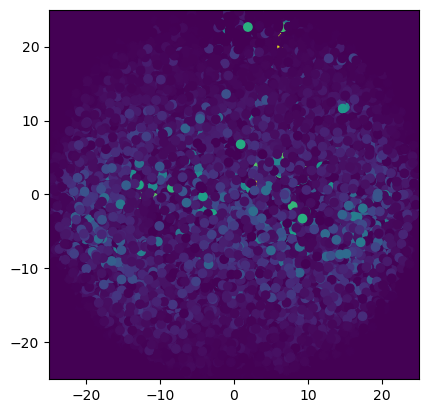

In [98]:
plt.scatter(random_points[:,1],random_points[:,2], c=np.sqrt(V[:,1]**2+V[:,2]**2), cmap='viridis')
plt.xlim(-25,25)
plt.ylim(-25,25)
# plt.clim(-5,5)
# plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')


In [82]:
median_particle_spacing2 = (volume/random_points.shape[0])**(1/3)
median_particle_spacing2

3.5000220373145443

<function matplotlib.pyplot.show(close=None, block=None)>

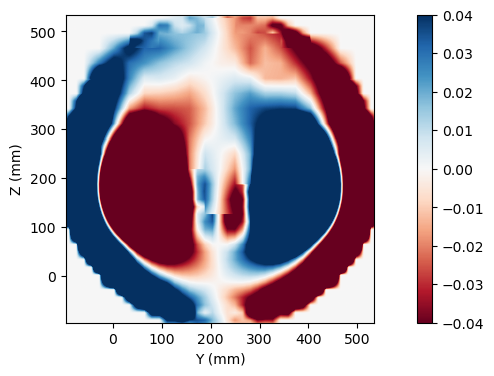

In [9]:
plane = 60
# Sample data loading (replace with actual data loading code)
data = omega[plane, :, :, 0]  # x, y, z
array = c[plane,:,:,0]

data = np.rot90(data, k=1)
array = np.rot90(array,k=1)
data = np.flipud(data)
array = np.flipud(array)
imshow_kwargs = dict(origin='lower', extent=[x.min(), x.max(), x.min(), x.max()])

plt.figure(figsize=(11, 4))
# plt.subplot(131)
# plt.title('Left D array')
plt.imshow(data, cmap="RdBu", **imshow_kwargs)
plt.clim(-0.04,0.04)
plt.xlabel('Y (mm)')
plt.ylabel('Z (mm)')
plt.colorbar()
# plt.legend()
plt.show


In [3]:
vtk.vtks_to_npzs()

Converting E:\503 RE wing_sim\Wing_v2_pipe_dirty_with_dye_lvl=12_CFL=10.000000_TV=1.000000_angle=-0.800000_Re=503.000000_0200.vtk to NPZ format...
Saving NPZ version of source to "E:\503 RE wing_sim\npz_files\Wing_v2_pipe_dirty_with_dye_lvl=12_CFL=10.000000_TV=1.000000_angle=-0.800000_Re=503.000000_0200.npz"
Converting E:\503 RE wing_sim\Wing_v2_pipe_dirty_with_dye_lvl=12_CFL=10.000000_TV=1.000000_angle=-0.800000_Re=503.000000_0201.vtk to NPZ format...
Saving NPZ version of source to "E:\503 RE wing_sim\npz_files\Wing_v2_pipe_dirty_with_dye_lvl=12_CFL=10.000000_TV=1.000000_angle=-0.800000_Re=503.000000_0201.npz"
Converting E:\503 RE wing_sim\Wing_v2_pipe_dirty_with_dye_lvl=12_CFL=10.000000_TV=1.000000_angle=-0.800000_Re=503.000000_0202.vtk to NPZ format...
Saving NPZ version of source to "E:\503 RE wing_sim\npz_files\Wing_v2_pipe_dirty_with_dye_lvl=12_CFL=10.000000_TV=1.000000_angle=-0.800000_Re=503.000000_0202.npz"
Converting E:\503 RE wing_sim\Wing_v2_pipe_dirty_with_dye_lvl=12_CFL=1

In [15]:
vtk.compute_values(xres=1,yres=0.25,zres=0.25, vort_range=(0.15,5))

Resampling frame: 200...
Resampling frame: 201...
Resampling frame: 202...
Resampling frame: 203...
Resampling frame: 204...
Resampling frame: 205...
Resampling frame: 206...
Resampling frame: 207...
Resampling frame: 208...
Resampling frame: 209...
Resampling frame: 210...
Resampling frame: 211...
Resampling frame: 212...
Resampling frame: 213...
Resampling frame: 214...
Resampling frame: 215...
Resampling frame: 216...
Resampling frame: 217...
Resampling frame: 218...
Resampling frame: 219...
Resampling frame: 220...
Resampling frame: 221...
Resampling frame: 222...
Resampling frame: 223...
Resampling frame: 224...
Resampling frame: 225...
Resampling frame: 226...
Resampling frame: 227...
Resampling frame: 228...
Resampling frame: 229...
Resampling frame: 230...
Resampling frame: 231...
Resampling frame: 232...
Resampling frame: 233...
Resampling frame: 234...
Resampling frame: 235...
Resampling frame: 236...
Resampling frame: 237...
Resampling frame: 238...
Resampling frame: 239...


In [5]:
df=pd.read_pickle(os.path.join(vtk.npz_dir_path, 'vtk_data.pkl'))
df

,frame,dist_from_wing,right_circ,right_circ_y,right_circ_z,right_dye_y,right_dye_z,right_err,left_circ,left_circ_y,left_circ_z,left_dye_y,left_dye_z,left_err
0,200,-96.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,200,-95.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,200,-94.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,200,-93.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,200,-92.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88575,414,311.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
88576,414,312.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
88577,414,313.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
88578,414,314.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [3]:
stats_data = pd.read_pickle(os.path.join(vtk.npz_dir_path, 'vtk_stats_data.pkl'))
stats_data

,x,right_circ_mean,right_circ_std,right_circ_d_mean,right_circ_d_std,right_circ_y_mean,right_circ_y_std,right_circ_z_mean,right_circ_z_std,right_dye_y_mean,...,left_circ_y_mean,left_circ_y_std,left_circ_z_mean,left_circ_z_std,left_dye_y_mean,left_dye_y_std,left_dye_z_mean,left_dye_z_std,left_err_mean,left_err_std
0,0.0,-47.413294,7.805275,15.090084,5.390089,15.175238,0.496075,-0.533443,1.100258,15.0,...,-15.086632,0.531981,-0.550542,0.761487,-15.0,8.586345e-16,0.05629,0.019160,1.212827,0.426780
1,3.0,-50.864464,2.753837,24.357678,6.500079,15.044015,0.365355,-0.649264,1.804865,15.0,...,-14.984500,0.431176,-0.792112,0.965446,-15.0,9.561349e-16,0.411074,0.012855,1.537647,0.459730
2,6.0,-81.888918,4.956797,60.143934,10.790751,12.311680,0.514624,-0.094953,1.795629,13.154539,...,-12.314395,0.393199,-0.302038,0.766830,-13.075725,3.365260e-01,0.760702,0.056489,1.500485,0.253447
3,9.0,-84.561573,2.535633,64.097857,12.113668,11.850477,0.570922,-0.298430,2.035225,12.73146,...,-11.918788,0.203371,-0.565919,0.860176,-12.648471,1.347217e-01,0.825107,0.004109,1.773552,0.058577
4,12.0,-84.743791,3.242557,68.171999,33.983772,12.312847,0.828478,-0.735720,2.287089,12.330493,...,-12.435527,0.316230,-1.079791,0.940523,-12.265709,4.402661e-01,0.910499,0.100069,2.331072,0.422207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,297.0,-23.247300,0.650821,30.566155,0.668338,9.520016,0.125179,-3.413454,0.122428,NaN,...,-9.514255,0.128793,-3.416525,0.155057,NaN,NaN,NaN,NaN,NaN,NaN
100,300.0,-22.719414,0.726077,30.191759,0.672792,9.513272,0.131481,-3.434501,0.126281,NaN,...,-9.502630,0.130366,-3.436891,0.155234,NaN,NaN,NaN,NaN,NaN,NaN
101,303.0,-22.018054,0.750953,29.751677,0.654971,9.516795,0.143348,-3.414951,0.118945,NaN,...,-9.502894,0.142537,-3.419694,0.155528,NaN,NaN,NaN,NaN,NaN,NaN
102,306.0,-21.029815,0.905104,29.288272,0.674204,9.539878,0.173371,-3.378294,0.118004,NaN,...,-9.539157,0.176532,-3.399309,0.154321,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
from vtianalysis import *
muvi = muvi = VTIAnalysis(r"E:\2024_05_08\531rpm_downstream")
stats_data_exp = pd.read_pickle(os.path.join(muvi.measure_path, 'vortex_measurements_avg.pkl'))
stats_data_sim = pd.read_pickle(os.path.join(vtk.npz_dir_path, 'vtk_stats_data.pkl'))
stats_data_exp

,x,right_circ_mean,right_circ_std,right_circ_d_mean,right_circ_d_std,right_circ_y_mean,right_circ_y_std,right_circ_z_mean,right_circ_z_std,right_dye_y_mean,...,left_circ_y_mean,left_circ_y_std,left_circ_z_mean,left_circ_z_std,left_dye_y_mean,left_dye_y_std,left_dye_z_mean,left_dye_z_std,left_error_mean,left_error_std
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,1020.0,-1.663347,1.164874,0.583032,0.883274,20.164108,3.473364,-1.523811,6.608349,9.037088,...,-9.004035,3.220138,21.175567,3.315562,-7.166417,0.023002,-1.315374,0.049652,22.834867,2.773987
511,1022.0,-1.928711,0.975957,0.580068,0.891825,20.444916,3.209259,-1.583423,5.629472,9.044315,...,-8.274030,2.694282,22.613835,2.014047,-7.165356,0.019238,-1.306164,0.045329,24.089100,1.886505
512,1024.0,-1.995870,0.940491,0.526148,0.897877,20.633816,3.297448,0.408137,5.254619,9.062516,...,-9.911198,4.993198,21.091270,6.771611,-7.162308,0.020479,-1.285621,0.030188,23.770003,2.786002
513,1026.0,-2.206718,0.619423,0.921206,0.423428,20.079828,2.759642,1.738620,5.705306,9.071635,...,-11.220571,5.013654,19.890787,7.095387,-7.160619,0.018531,-1.275485,0.015551,22.886296,2.997146


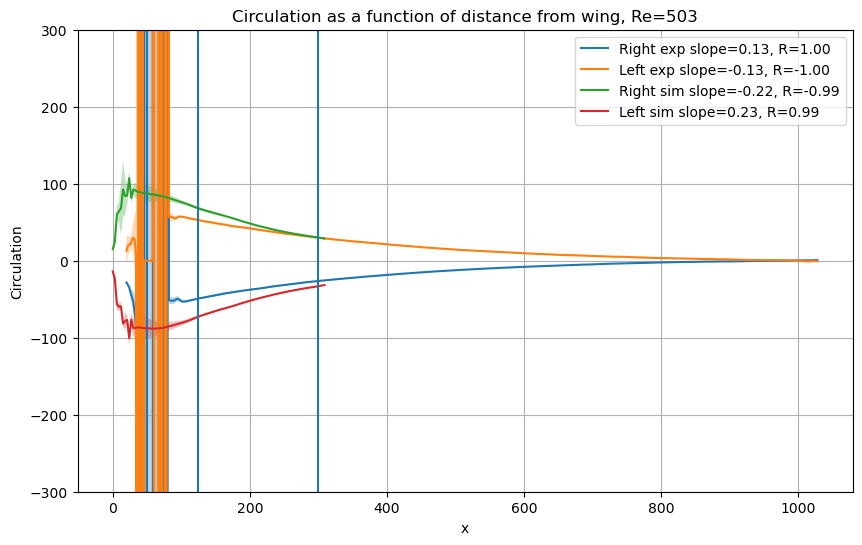

In [30]:
from scipy.stats import linregress
x_values_exp = stats_data_exp['x']
right_mean_exp = stats_data_exp['right_circ_d_mean']
right_std_exp = stats_data_exp['right_circ_d_std']
left_mean_exp = stats_data_exp['left_circ_d_mean']
left_std_exp = stats_data_exp['left_circ_d_std']

x_values_sim = stats_data_sim['x']
right_mean_sim = stats_data_sim['right_circ_d_mean']
right_std_sim = stats_data_sim['right_circ_d_std']
left_mean_sim = stats_data_sim['left_circ_d_mean']
left_std_sim = stats_data_sim['left_circ_d_std']

x_values_exp = pd.to_numeric(stats_data_exp['x'], errors='coerce')
x_values_sim = pd.to_numeric(stats_data_sim['x'], errors='coerce')

x_slope_start = 125
x_slope_end = 300

# Filter data within the range x = 100 to x = 300
def filter_data(x_values, mean_values, std_values, start=x_slope_start, end=x_slope_end):
    mask = (x_values >= start) & (x_values <= end)
    return x_values[mask], mean_values[mask], std_values[mask]

x_values_exp_100_300, right_mean_exp_100_300, _ = filter_data(x_values_exp, right_mean_exp, right_std_exp)
_, left_mean_exp_100_300, _ = filter_data(x_values_exp, left_mean_exp, left_std_exp)
x_values_sim_100_300, right_mean_sim_100_300, _ = filter_data(x_values_sim, right_mean_sim, right_std_sim)
_, left_mean_sim_100_300, _ = filter_data(x_values_sim, left_mean_sim, left_std_sim)

# Perform linear regression
def linear_regression(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope, r_value

right_slope_exp, right_r_exp= linear_regression(x_values_exp_100_300, right_mean_exp_100_300)
left_slope_exp, left_r_exp= linear_regression(x_values_exp_100_300, left_mean_exp_100_300)
right_slope_sim, right_r_sim= linear_regression(x_values_sim_100_300, right_mean_sim_100_300)
left_slope_sim, left_r_sim= linear_regression(x_values_sim_100_300, left_mean_sim_100_300)

plt.figure(figsize=(10, 6))
plt.plot(x_values_exp, right_mean_exp, label=f'Right exp slope={right_slope_exp:.2f}, R={right_r_exp:.2f}')
plt.fill_between(x_values_exp, right_mean_exp-right_std_exp, right_mean_exp+right_std_exp, alpha=0.3)
plt.plot(x_values_exp, left_mean_exp, label=f'Left exp slope={left_slope_exp:.2f}, R={left_r_exp:.2f}')
plt.fill_between(x_values_exp, left_mean_exp-left_std_exp, left_mean_exp+left_std_exp, alpha=0.3)
plt.plot(x_values_sim, right_mean_sim, label=f'Right sim slope={right_slope_sim:.2f}, R={right_r_sim:.2f}')
plt.fill_between(x_values_sim, right_mean_sim-right_std_sim, right_mean_sim+right_std_sim, alpha=0.3)
plt.plot(x_values_sim, left_mean_sim, label=f'Left sim slope={left_slope_sim:.2f}, R={left_r_sim:.2f}')
plt.fill_between(x_values_sim, left_mean_sim-left_std_sim, left_mean_sim+left_std_sim, alpha=0.3)
plt.vlines(x_slope_start,-300,300)
plt.vlines(x_slope_end,-300,300)

plt.xlabel('x')
plt.ylabel('Circulation')
plt.title('Circulation as a function of distance from wing, Re=503')
plt.legend()
# plt.xlim(0,350)
plt.ylim(-300,300)
plt.grid(True)
plt.show()

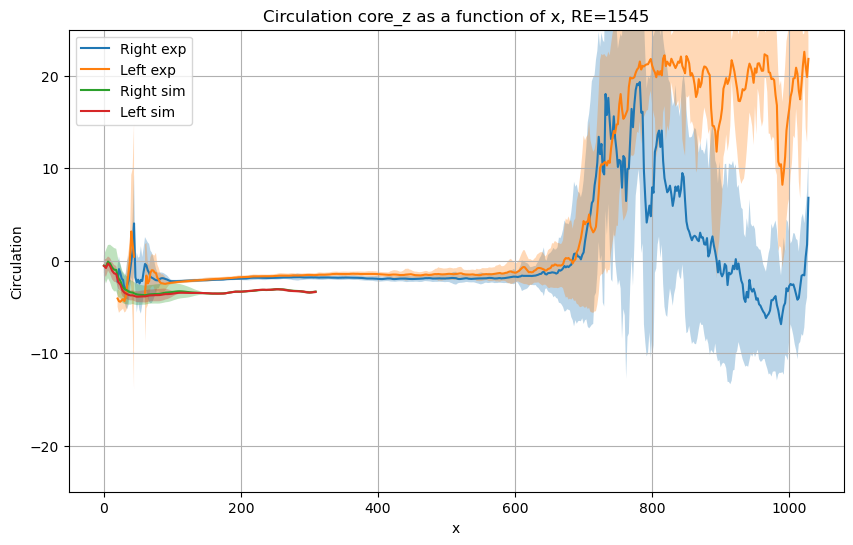

In [31]:
from scipy.stats import linregress
x_values_exp = stats_data_exp['x']
right_mean_exp = stats_data_exp['right_circ_z_mean']
right_std_exp = stats_data_exp['right_circ_z_std']
left_mean_exp = stats_data_exp['left_circ_z_mean']
left_std_exp = stats_data_exp['left_circ_z_std']

x_values_sim = stats_data_sim['x']
right_mean_sim = stats_data_sim['right_circ_z_mean']
right_std_sim = stats_data_sim['right_circ_z_std']
left_mean_sim = stats_data_sim['left_circ_z_mean']
left_std_sim = stats_data_sim['left_circ_z_std']

plt.figure(figsize=(10, 6))
plt.plot(x_values_exp, right_mean_exp, label=f'Right exp')
plt.fill_between(x_values_exp, right_mean_exp-right_std_exp, right_mean_exp+right_std_exp, alpha=0.3)
plt.plot(x_values_exp, left_mean_exp, label=f'Left exp')
plt.fill_between(x_values_exp, left_mean_exp-left_std_exp, left_mean_exp+left_std_exp, alpha=0.3)

plt.plot(x_values_sim, right_mean_sim, label=f'Right sim')
plt.fill_between(x_values_sim, right_mean_sim-right_std_sim, right_mean_sim+right_std_sim, alpha=0.3)
plt.plot(x_values_sim, left_mean_sim, label=f'Left sim')
plt.fill_between(x_values_sim, left_mean_sim-left_std_sim, left_mean_sim+left_std_sim, alpha=0.3)

plt.xlabel('x')
plt.ylabel('Circulation')
plt.title('Circulation core_z as a function of x, RE=1545')
plt.legend()
# plt.xlim(0,350)
plt.ylim(-25,25)
plt.grid(True)
plt.show()

In [24]:
import subprocess
for frame in range(80,172):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, right_mean, label='Right Circulation')
    plt.fill_between(x_values, right_mean-right_std, right_mean+right_std, alpha=0.3)

    plt.plot(x_values, left_mean, label='left Circulation')
    plt.fill_between(x_values, left_mean-left_std, left_mean+left_std, alpha=0.3)
    df2 = df[df['frame']==frame]
    plt.plot(df2['dist_from_wing'],df2['right_circ'])
    plt.plot(df2['dist_from_wing'],df2['left_circ'])

    plt.xlabel('x')
    plt.ylabel('Circulation')
    plt.title('Mean Circulations as a Function of x')
    plt.legend()
    plt.grid(True)

    plt.xlim(-100,350)
    plt.ylim(-300,300)
    plt.savefig(f'sim_circulations_{(frame-80):04d}.png')
    plt.close()
                
# Define paths
output_filename =  "sim_circulations2.mp4"
input_pattern = "sim_circulations_%04d.png"
framerate = 34.8  # Specify the framerate

# Define ffmpeg command
ffmpeg_cmd = [
    "ffmpeg", 
    "-framerate", str(framerate), 
    "-i", input_pattern, 
    "-c:v", "libx264", 
    "-r", "30", 
    "-pix_fmt", "yuv420p", 
    output_filename
]

# Run the command and capture the output
result = subprocess.run(ffmpeg_cmd, capture_output=True, text=True)

# Print the output and error (if any)
print("Standard Output:\n", result.stdout)
print("Standard Error:\n", result.stderr)

# Check if there was an error
if result.returncode != 0:
    print(f"ffmpeg command failed with return code {result.returncode}")
else:
    print("ffmpeg command executed successfully.")
    
    # Remove the .png files if the video was successfully created
    for i in range(80,172):
        os.remove(f"sim_circulations_{(i-80):04d}.png")


Standard Output:
 
Standard Error:
 ffmpeg version 4.4-essentials_build-www.gyan.dev Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (Rev6, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm -

In [25]:
for frame in range(80,172):
    plt.figure(figsize=(10, 6))
    df2 = df[df['frame']==frame]
    plt.plot(df2['dist_from_wing'],df2['right_dye_z'])
    plt.plot(df2['dist_from_wing'],df2['left_dye_z'])

    plt.xlabel('x')
    plt.ylabel('Error (mm)')
    plt.title('Error between dye and vorticity max')
    plt.legend()
    plt.grid(True)

    plt.xlim(-100,350)
    plt.ylim(-10,10)
    plt.savefig(f'sim_dye_z_{(frame-80):04d}.png')
    plt.close()
                
# Define paths
output_filename =  "sim_dye_z2.mp4"
input_pattern = "sim_dye_z_%04d.png"
framerate = 34.8  # Specify the framerate

# Define ffmpeg command
ffmpeg_cmd = [
    "ffmpeg", 
    "-framerate", str(framerate), 
    "-i", input_pattern, 
    "-c:v", "libx264", 
    "-r", "30", 
    "-pix_fmt", "yuv420p", 
    output_filename
]

# Run the command and capture the output
result = subprocess.run(ffmpeg_cmd, capture_output=True, text=True)

# Print the output and error (if any)
print("Standard Output:\n", result.stdout)
print("Standard Error:\n", result.stderr)

# Check if there was an error
if result.returncode != 0:
    print(f"ffmpeg command failed with return code {result.returncode}")
else:
    print("ffmpeg command executed successfully.")
    
    # Remove the .png files if the video was successfully created
    for i in range(80,172):
        os.remove(f"sim_dye_z_{(i-80):04d}.png")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

Standard Output:
 
Standard Error:
 ffmpeg version 4.4-essentials_build-www.gyan.dev Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (Rev6, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm -

In [28]:
for frame in range(80,172):
    plt.figure(figsize=(10, 6))
    df2 = df[df['frame']==frame]
    plt.plot(df2['dist_from_wing'],df2['right_circ_z'])
    plt.plot(df2['dist_from_wing'],df2['left_circ_z'])
    plt.plot(df2['dist_from_wing'],df2['right_dye_z'])
    plt.plot(df2['dist_from_wing'],df2['left_dye_z'])


    plt.xlabel('x')
    plt.ylabel('Error (mm)')
    plt.title('Error between dye and vorticity max')
    plt.legend()
    plt.grid(True)

    plt.xlim(-100,350)
    plt.ylim(-10,10)
    plt.savefig(f'sim_z_{(frame-80):04d}.png')
    plt.close()
                
# Define paths
output_filename =  "sim_z.mp4"
input_pattern = "sim_z_%04d.png"
framerate = 34.8  # Specify the framerate

# Define ffmpeg command
ffmpeg_cmd = [
    "ffmpeg", 
    "-framerate", str(framerate), 
    "-i", input_pattern, 
    "-c:v", "libx264", 
    "-r", "30", 
    "-pix_fmt", "yuv420p", 
    output_filename
]

# Run the command and capture the output
result = subprocess.run(ffmpeg_cmd, capture_output=True, text=True)

# Print the output and error (if any)
print("Standard Output:\n", result.stdout)
print("Standard Error:\n", result.stderr)

# Check if there was an error
if result.returncode != 0:
    print(f"ffmpeg command failed with return code {result.returncode}")
else:
    print("ffmpeg command executed successfully.")
    
    # Remove the .png files if the video was successfully created
    for i in range(80,172):
        os.remove(f"sim_z_{(i-80):04d}.png")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

Standard Output:
 
Standard Error:
 ffmpeg version 4.4-essentials_build-www.gyan.dev Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (Rev6, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm -

In [10]:
vtk.vtks_to_npzs()

Found NPZ version of E:\vts files for noise comparison\Wing_v2_pipe_dirty_with_dye_lvl=12_CFL=10.000000_TV=1.000000_angle=-0.800000_Re=1545.000000_0080.vtk, skipping conversion.
Found NPZ version of E:\vts files for noise comparison\Wing_v2_pipe_dirty_with_dye_lvl=12_CFL=10.000000_TV=1.000000_angle=-0.800000_Re=1545.000000_0081.vtk, skipping conversion.
Found NPZ version of E:\vts files for noise comparison\Wing_v2_pipe_dirty_with_dye_lvl=12_CFL=10.000000_TV=1.000000_angle=-0.800000_Re=1545.000000_0082.vtk, skipping conversion.
Found NPZ version of E:\vts files for noise comparison\Wing_v2_pipe_dirty_with_dye_lvl=12_CFL=10.000000_TV=1.000000_angle=-0.800000_Re=1545.000000_0083.vtk, skipping conversion.
Found NPZ version of E:\vts files for noise comparison\Wing_v2_pipe_dirty_with_dye_lvl=12_CFL=10.000000_TV=1.000000_angle=-0.800000_Re=1545.000000_0084.vtk, skipping conversion.
Found NPZ version of E:\vts files for noise comparison\Wing_v2_pipe_dirty_with_dye_lvl=12_CFL=10.000000_TV=1.0

KeyboardInterrupt: 